
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [18]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self.mean, self.std

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [21]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0.0
        self.losses = np.zeros(self.epochs)
        for epoch in range(self.epochs):
            y_pred = X @ self.weights + self.bias
            loss = (1 / m) * np.sum((y_pred - y) ** 2)
            loss += self.l2_lambda * np.sum(self.weights ** 2)
            self.losses[epoch] = loss
            dw = (2 / m) * X.T @ (y_pred - y) + 2 * self.l2_lambda * self.weights
            db = (2 / m) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

        return self.weights, self.bias, self.losses

    def predict(self, X):
        return X @ self.weights + self.bias


In [14]:
# Dataset Creation
np.random.seed(0)
m = 300
X = np.random.randn(m)
t_weight = 4.0
t_bias = 3.0
n = np.random.normal(0, 0.4, size = m)
y = np.dot(X, t_weight) + t_bias + n

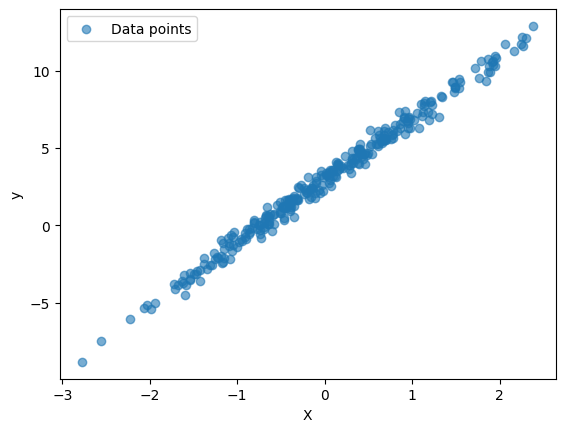

In [15]:
plt.scatter(X, y, alpha=0.6, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [24]:
# Train-test split
X_train, y_train = X[:200], y[:200]
X_test, y_test = X[200:], y[200:]

In [25]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [26]:
scale = StandardScalerManual()
X_train = scale.fit_transform(X_train)
X_scaled = scale.transform(X_test)

In [27]:
model = LinearRegressionManual()
w,b,loss = model.fit(X_train, y_train)
pred = model.predict(X_scaled)
print("Weights:", w)
print("Bias:", b)

Weights: [4.0673349]
Bias: 3.241769782631885


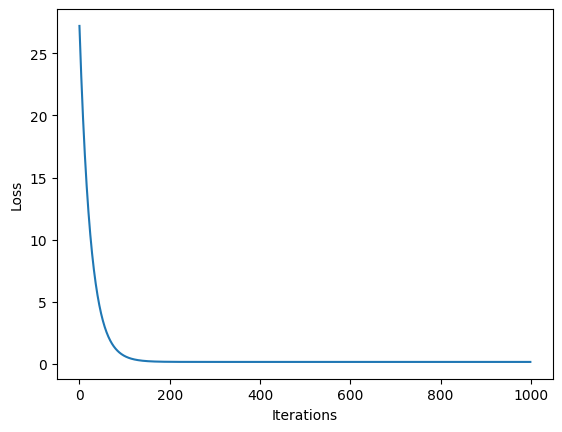

In [28]:
plt.plot(loss)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

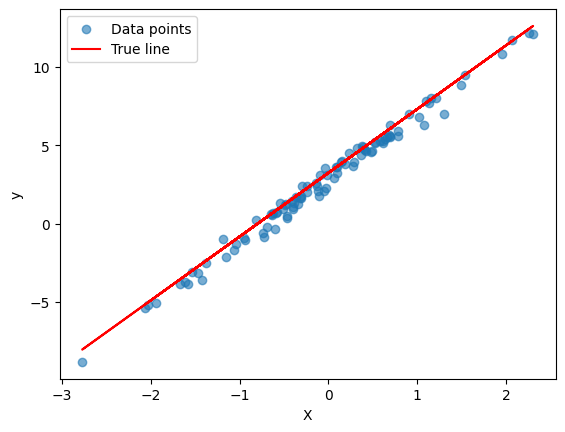

In [29]:
plt.scatter(X_test, y_test, alpha=0.6, label="Data points")
y_line = w * X_test + b
plt.plot(X_test, y_line, color="red", label="True line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [30]:

#Implement sigmoid function as told in the lectures
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [31]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0.0
        self.losses = np.zeros(self.epochs)
        for epoch in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)
            # Numerical stability
            eps = 1e-15
            y_pred = np.clip(y_pred, eps, 1 - eps)
            # Loss
            loss = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
            loss += self.l2_lambda * np.sum(self.weights ** 2)
            self.losses[epoch] = loss
            # Gradients
            dw = (1 / m) * np.dot(X.T, (y_pred - y)) + 2 * self.l2_lambda * self.weights
            db = (1 / m) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        return self.weights, self.bias, self.losses

    def predict_proba(self, X):
        return sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

In [32]:
# Dataset Creation
np.random.seed(0)
m = 300
X = np.random.randn(m, 1)
w_true = 3.0
b_true = -0.5
probs = sigmoid(w_true * X.squeeze() + b_true)

y = (probs >= 0.5).astype(int)

In [33]:
def shuffle_data(X, y):
    np.random.seed(42)
    idx = np.random.permutation(X.shape[0])
    return X[idx], y[idx]

In [34]:
X, y = shuffle_data(X, y)
X_train, y_train = X[:200], y[:200]
X_test, y_test = X[200:], y[200:]

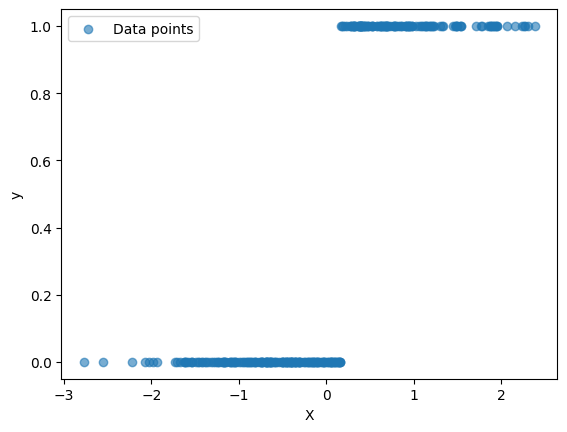

In [35]:
plt.scatter(X, y, alpha=0.6, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [36]:
scale = StandardScalerManual()
X_train = scale.fit_transform(X_train)
X_scaled = scale.transform(X_test)

In [37]:
model = LogisticRegressionManual()
w, b, loss = model.fit(X_train, y_train)

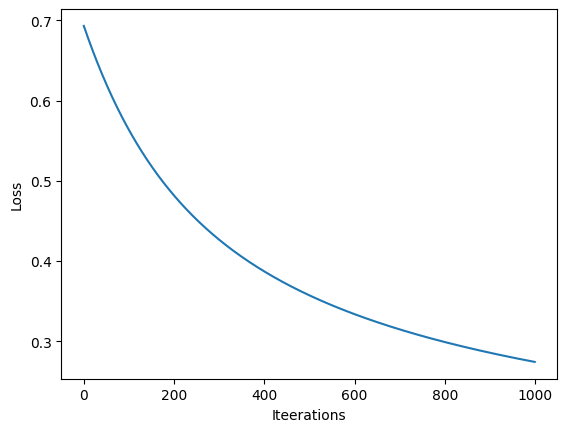

In [38]:
plt.plot(loss)
plt.xlabel('Iteerations')
plt.ylabel('Loss')
plt.show()

In [39]:
print("Weights:", w)
print("Bias:", b)

Weights: [1.86901944]
Bias: -0.28054876538333434


In [40]:
pred = model.predict(X_scaled)
accuracy = np.mean(pred == y_test)
print("Accuracy:", accuracy * 100, "%")

Accuracy: 99.0 %



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [41]:
def kmeans_matrix(M, k, max_iters=100):
    """
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    """
    m, n = M.shape
    data = M.reshape(-1, 1)
    centroids = np.random.choice(data.flatten(), size=k, replace=False)

    for _ in range(max_iters):
        distances = np.abs(data - centroids.reshape(1, -1))
        labels = np.argmin(distances, axis=1)
        prev_centroids = centroids.copy()
        for cluster_id in range(k):
            cluster_points = data[labels == cluster_id]
            if len(cluster_points) > 0:
                centroids[cluster_id] = cluster_points.mean()

        if np.allclose(prev_centroids, centroids):
            break

    assignment_table = labels.reshape(m, n)
    cookbook = {i: [] for i in range(k)}
    for idx, label in enumerate(labels):
        i, j = divmod(idx, n)
        cookbook[label].append((i, j))

    return assignment_table, cookbook, centroids

In [42]:
# Dataset Creation
np.random.seed(0)
M = np.random.randint(0, 100, size = (3, 5))
print(M)

[[44 47 64 67 67]
 [ 9 83 21 36 87]
 [70 88 88 12 58]]


In [43]:
k = 3
assignment_table, cookbook, centroids = kmeans_matrix(M, k)
print("Centroids:", centroids)
print("Assignment Table:\n", assignment_table)

Centroids: [19 86 59]
Assignment Table:
 [[2 2 2 2 2]
 [0 1 0 0 1]
 [2 1 1 0 2]]


In [45]:
for idx, positions in cookbook.items():
    print(f"Cluster {idx}:")
    for (i, j) in positions:
        print(M[i, j], end=" ")
    print("\n")

Cluster 0:
9 21 36 12 

Cluster 1:
83 87 88 88 

Cluster 2:
44 47 64 67 67 70 58 




## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
